# SVM based mushroom classification

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Reading data from csv

In [2]:
df=pd.read_csv('mushrooms.csv')

### Exploratory Data Analysis:

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Function to map categorical features to integral values

In [4]:
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### no missing values

In [6]:
df.shape

(8124, 23)

#### Encoder at work

In [7]:
for i in range(df.shape[1]):
    category={}
    df.iloc[:,i]=df.iloc[:,i].apply(Encoder)

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


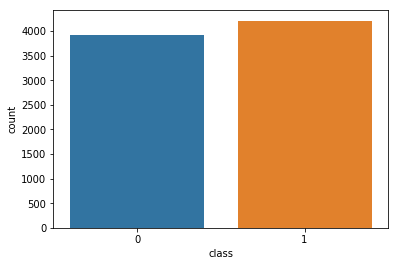

In [9]:
sns.countplot(x='class',data=df)

roughly equivalent distribution

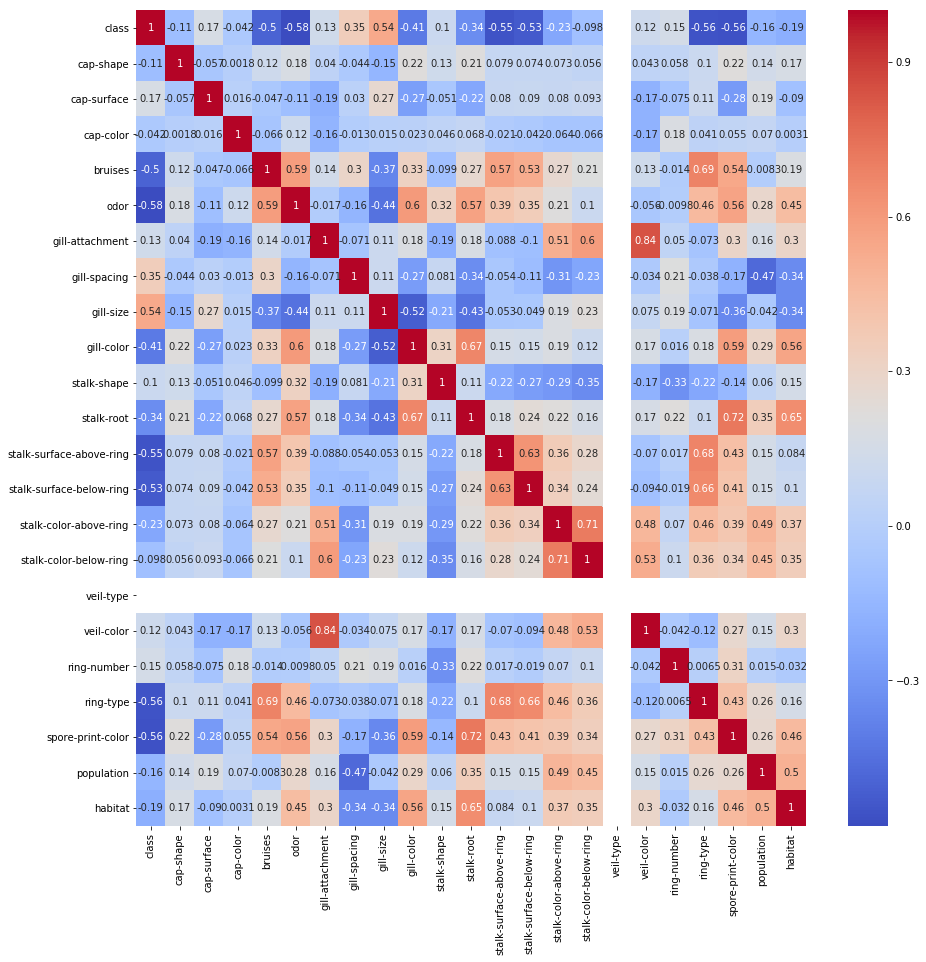

In [10]:
correlation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

#### why is veil-type showing such unusual behavior?

In [11]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

#### it's 0 for the entire dataset and is thus useless for analysis
#### Let's check for other such const cases by checking mean of each column,for const columns mean will be in whole number

In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,...,0.994584,1.149680,1.061546,0.0,0.038405,0.082718,0.696209,2.200886,2.687839,2.794682
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.333097,1.563541,1.648595,0.0,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,...,3.000000,2.000000,1.000000,0.0,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [13]:
X=df.drop(['class','veil-type'],axis=1)

In [14]:
y=df['class']

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


### Training the model:

In [16]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,y,test_size=0.30)

#### Using grid search with 10-fold cross validation to find the best set of parameters:

In [17]:
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100]},
              {'kernel': ['linear'], 'C': [1, 10, 100]}]

grid=GridSearchCV(svc,param_grid,cv=10,scoring='accuracy')
print("Tuning hyper-parameters")
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(np.round(grid.best_score_,3))

Tuning hyper-parameters
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.0


#### Making classifier using above parameters

In [18]:
svc=SVC(C=100,gamma=0.001,kernel='rbf')

In [19]:
svc.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svc.score(X_test,Y_test)

1.0

## 100% accuracy achieved

### Confusion Matrix:

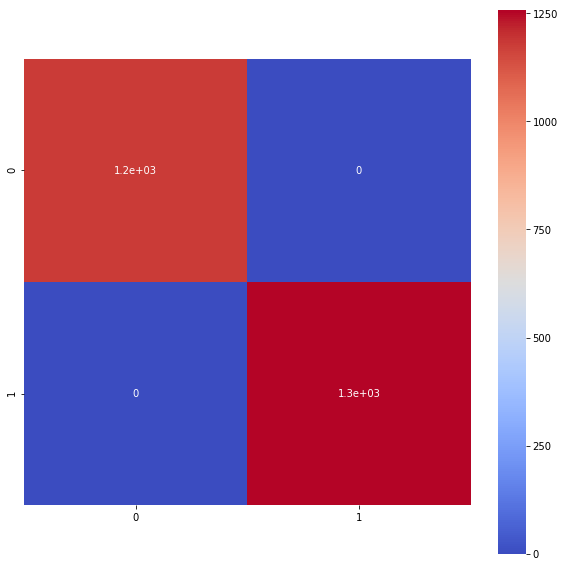

In [21]:
Ypreds=svc.predict(X_test)
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([0,1])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)